# ***Importing Dataset***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Importing Libraries***

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt

# ***Data Preprocessing***

## ***Training Image preprocessing***

In [5]:
#Using Tensorflow Keras
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Product Recognizer/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


## ***Validation Image preprocessing***

In [6]:
#Using Tensorflow Keras
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Product Recognizer/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# ***Building Model***

In [7]:
cnn = tf.keras.models.Sequential()

## ***Building Convolution Layer***

In [8]:
#Building Convolution and Pooling Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
#Adding more Convolution and Pooling Layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [16]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# ***Compiling and Training Phase***

In [20]:
#Compiling the Model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [21]:
#Training Process
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 173s 2s/step - loss: 3.2721 - accuracy: 0.0726 - val_loss: 3.1172 - val_accuracy: 0.0912
Epoch 2/32
98/98 [==============================] - 172s 2s/step - loss: 3.2020 - accuracy: 0.0848 - val_loss: 2.9861 - val_accuracy: 0.1880
Epoch 3/32
98/98 [==============================] - 168s 2s/step - loss: 3.1505 - accuracy: 0.0934 - val_loss: 2.9068 - val_accuracy: 0.1937
Epoch 4/32
98/98 [==============================] - 169s 2s/step - loss: 2.9656 - accuracy: 0.1445 - val_loss: 2.4066 - val_accuracy: 0.4131
Epoch 5/32
98/98 [==============================] - 171s 2s/step - loss: 2.7848 - accuracy: 0.2087 - val_loss: 2.1040 - val_accuracy: 0.4758
Epoch 6/32
98/98 [==============================] - 176s 2s/step - loss: 2.5082 - accuracy: 0.2857 - val_loss: 1.5673 - val_accuracy: 0.6581
Epoch 7/32
98/98 [==============================] - 164s 2s/step - loss: 2.1597 - accuracy: 0.3920 - val_loss: 1.1511 - val_accuracy: 0.7293
Epoch 8/32
98

# ***Evaluating Model***

In [22]:
#Calculating Training Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 95s 919ms/step - loss: 0.1260 - accuracy: 0.9602
Training accuracy: 0.9601926207542419


In [23]:
#Calculating Validation Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 14s 453ms/step - loss: 0.3653 - accuracy: 0.9202
Validation accuracy: 0.9202279448509216


## ***Saving Model***

In [ ]:
cnn.save('Trained_Model.h5')

In [25]:
training_history.history

{'loss': [3.272062063217163,
  3.2020163536071777,
  3.150547981262207,
  2.965611457824707,
  2.784806489944458,
  2.5082414150238037,
  2.1597490310668945,
  1.772530436515808,
  1.50052809715271,
  1.2589259147644043,
  1.0652644634246826,
  0.9325039982795715,
  0.8030523657798767,
  0.7117024660110474,
  0.6065986156463623,
  0.524878740310669,
  0.5746893286705017,
  0.4889702796936035,
  0.48046666383743286,
  0.42229634523391724,
  0.4384419620037079,
  0.38495728373527527,
  0.4049089550971985,
  0.35959210991859436,
  0.4192174971103668,
  0.3233429193496704,
  0.304931640625,
  0.30592674016952515,
  0.28110218048095703,
  0.3094382584095001,
  0.2855445444583893,
  0.2606349587440491],
 'accuracy': [0.0725521668791771,
  0.0847512036561966,
  0.09341894090175629,
  0.14446227252483368,
  0.20866774022579193,
  0.2857142984867096,
  0.3919743299484253,
  0.4853932559490204,
  0.5739967823028564,
  0.6356340050697327,
  0.6895666122436523,
  0.7277688384056091,
  0.7685393095

In [26]:
#Creating a .json file for storing the Training History
import json
with open('Training_History.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## ***Calculating Accuracy of Model Achieved on Validation set***

In [28]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.02279448509216 %


# ***Accuracy Visualization***

## ***Training Visualization***

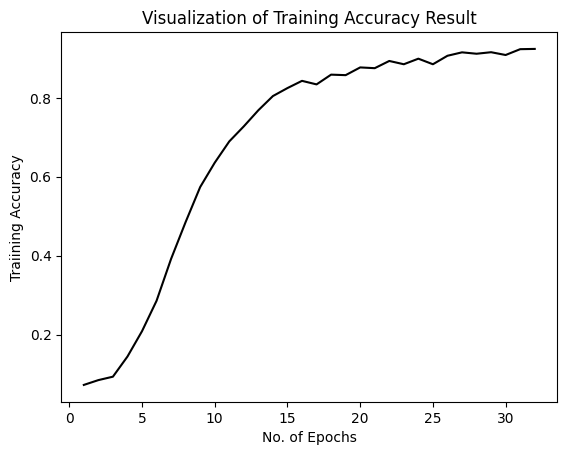

In [29]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='black')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## ***Validation Accuracy***

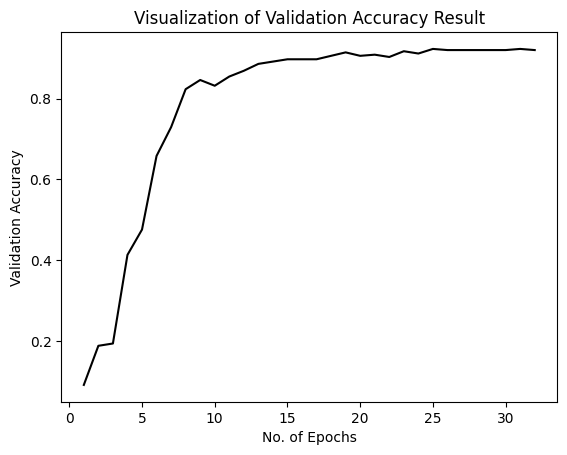

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'],color='black')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## ***Test Set Evaluation***

In [31]:
#Using Tensorflow Keras
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Product Recognizer/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [44]:
#Final Accuracy of the Model
test_loss,test_acc = cnn.evaluate(test_set)
print('Model Accuracy:', test_acc*100,"%")

12/12 [==============================] - 14s 346ms/step - loss: 0.3572 - accuracy: 0.9220
Model Accuracy: 92.20055937767029 %
